# Hamon: Pagsusuri ng Teksto tungkol sa Data Science

> *Sa notebook na ito, sinusubukan natin ang paggamit ng iba't ibang URL - artikulo sa Wikipedia tungkol sa Machine Learning. Makikita mo na, hindi tulad ng Data Science, ang artikulong ito ay naglalaman ng maraming termino, na nagiging mas mahirap ang pagsusuri. Kailangan nating mag-isip ng ibang paraan upang linisin ang data pagkatapos ng keyword extraction, upang maalis ang ilang madalas ngunit hindi makabuluhang kombinasyon ng mga salita.*

Sa halimbawang ito, gawin natin ang isang simpleng ehersisyo na sumasaklaw sa lahat ng hakbang ng tradisyunal na proseso ng data science. Hindi mo kailangang magsulat ng anumang code, maaari mo lamang i-click ang mga cell sa ibaba upang maisagawa ang mga ito at obserbahan ang resulta. Bilang hamon, hinihikayat kang subukan ang code na ito gamit ang iba't ibang data.

## Layunin

Sa araling ito, tinalakay natin ang iba't ibang konsepto na may kaugnayan sa Data Science. Subukan nating tuklasin ang mas maraming kaugnay na konsepto sa pamamagitan ng **text mining**. Magsisimula tayo sa isang teksto tungkol sa Data Science, mag-eextract ng mga keyword mula rito, at pagkatapos ay susubukan nating i-visualize ang resulta.

Bilang teksto, gagamitin ko ang pahina tungkol sa Data Science mula sa Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Hakbang 1: Pagkuha ng Datos

Ang unang hakbang sa bawat proseso ng data science ay ang pagkuha ng datos. Gagamitin natin ang `requests` library para dito:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Hakbang 2: Pagbabago ng Datos

Ang susunod na hakbang ay ang pag-convert ng datos sa anyo na angkop para sa pagproseso. Sa ating kaso, nag-download tayo ng HTML source code mula sa pahina, at kailangan natin itong gawing plain text.

Maraming paraan para magawa ito. Gagamitin natin ang pinakasimpleng built-in na [HTMLParser](https://docs.python.org/3/library/html.parser.html) object mula sa Python. Kailangan nating mag-subclass sa `HTMLParser` class at tukuyin ang code na kokolekta ng lahat ng teksto sa loob ng mga HTML tag, maliban sa mga `<script>` at `<style>` na tag.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Hakbang 3: Pagkuha ng Mga Pananaw

Ang pinakamahalagang hakbang ay ang gawing isang anyo ang ating datos kung saan maaari tayong makakuha ng mga pananaw. Sa ating kaso, nais nating kumuha ng mga keyword mula sa teksto, at tingnan kung alin sa mga keyword ang mas makabuluhan.

Gagamit tayo ng Python library na tinatawag na [RAKE](https://github.com/aneesha/RAKE) para sa pagkuha ng mga keyword. Una, i-install natin ang library na ito kung sakaling wala pa ito:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Ang pangunahing functionality ay makukuha mula sa `Rake` na object, na maaari nating i-customize gamit ang ilang mga parameter. Sa ating kaso, itatakda natin ang minimum na haba ng isang keyword sa 5 karakter, ang minimum na dalas ng isang keyword sa dokumento sa 3, at ang maximum na bilang ng mga salita sa isang keyword - sa 2. Malaya kang mag-eksperimento sa ibang mga halaga at obserbahan ang resulta.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Nakuha namin ang isang listahan ng mga termino kasama ang kaukulang antas ng kahalagahan. Tulad ng makikita mo, ang mga pinaka-nauugnay na disiplina, tulad ng machine learning at big data, ay nasa mga nangungunang posisyon sa listahan.

## Hakbang 4: Pagpapakita ng Resulta

Mas naiintindihan ng mga tao ang datos kapag ito ay nasa biswal na anyo. Kaya’t madalas na may saysay na i-visualize ang datos upang makakuha ng ilang mga pananaw. Maaari nating gamitin ang `matplotlib` library sa Python upang mag-plot ng simpleng distribusyon ng mga keyword kasama ang kanilang kaugnayan:


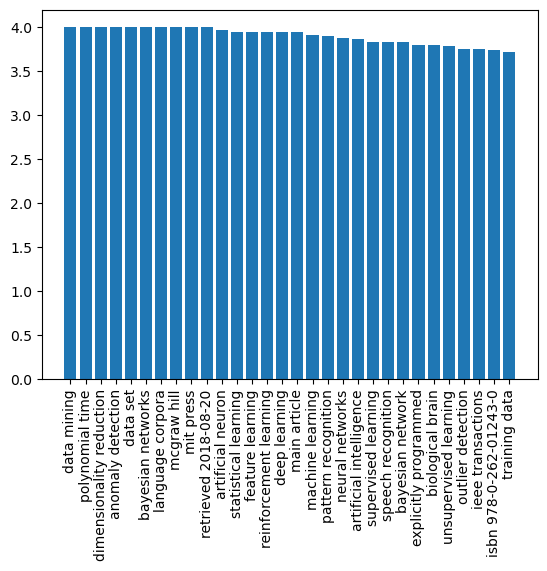

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Mayroon, gayunpaman, mas mahusay na paraan upang maipakita ang dalas ng mga salita - gamit ang **Word Cloud**. Kailangan nating mag-install ng isa pang library upang maipakita ang word cloud mula sa ating listahan ng mga keyword.


In [71]:
!{sys.executable} -m pip install wordcloud

Ang `WordCloud` na object ay responsable sa pagtanggap ng alinman sa orihinal na teksto, o pre-computed na listahan ng mga salita kasama ang kanilang mga dalas, at nagbabalik ng isang imahe, na maaaring ipakita gamit ang `matplotlib`:


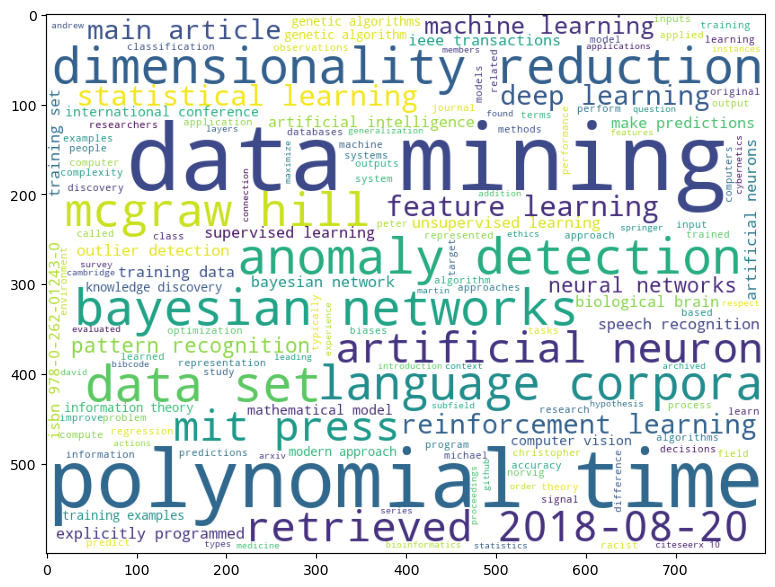

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Maaari rin nating ipasa ang orihinal na teksto sa `WordCloud` - tingnan natin kung makakakuha tayo ng katulad na resulta:


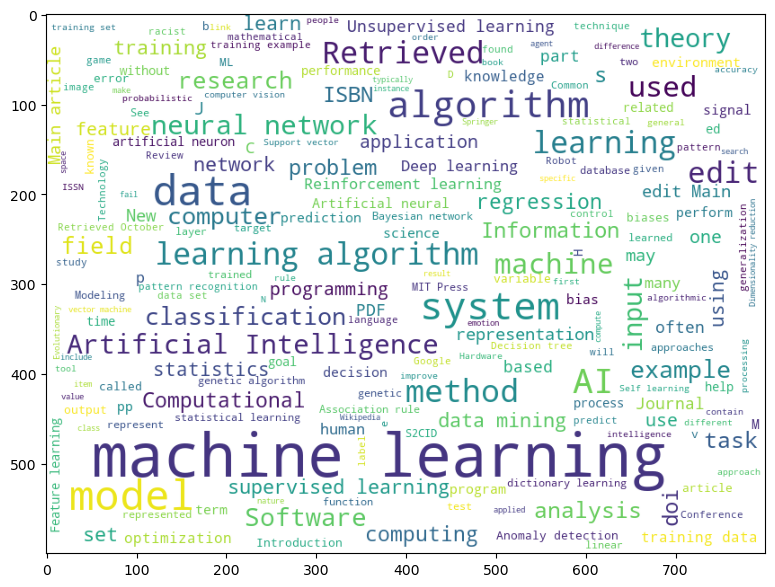

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Makikita mo na mas kahanga-hanga na ngayon ang word cloud, ngunit naglalaman din ito ng maraming ingay (halimbawa, mga hindi kaugnay na salita tulad ng `Retrieved on`). Bukod dito, mas kaunti ang mga keyword na binubuo ng dalawang salita, tulad ng *data scientist* o *computer science*. Ito ay dahil mas mahusay ang RAKE algorithm sa pagpili ng magagandang keyword mula sa teksto. Ang halimbawang ito ay nagpapakita ng kahalagahan ng pag-pre-process at paglilinis ng data, dahil ang malinaw na larawan sa dulo ay magbibigay-daan sa atin na gumawa ng mas mahusay na desisyon.

Sa ehersisyong ito, dumaan tayo sa isang simpleng proseso ng pagkuha ng kahulugan mula sa teksto ng Wikipedia, sa anyo ng mga keyword at word cloud. Ang halimbawang ito ay medyo simple, ngunit mahusay nitong ipinapakita ang mga karaniwang hakbang na ginagawa ng isang data scientist kapag nagtatrabaho sa data, simula sa pagkuha ng data hanggang sa visualization.

Sa ating kurso, tatalakayin natin nang detalyado ang lahat ng mga hakbang na ito.



---

**Paunawa**:  
Ang dokumentong ito ay isinalin gamit ang AI translation service na [Co-op Translator](https://github.com/Azure/co-op-translator). Bagama't sinisikap naming maging tumpak, pakitandaan na ang mga awtomatikong pagsasalin ay maaaring maglaman ng mga pagkakamali o hindi pagkakatugma. Ang orihinal na dokumento sa kanyang orihinal na wika ang dapat ituring na opisyal na sanggunian. Para sa mahalagang impormasyon, inirerekomenda ang propesyonal na pagsasalin ng tao. Hindi kami mananagot sa anumang hindi pagkakaunawaan o maling interpretasyon na maaaring magmula sa paggamit ng pagsasaling ito.
